In [1]:
import autogluon

In [2]:
from autogluon.tabular import TabularDataset, TabularPredictor 

In [3]:
train_data = TabularDataset('TrainSet_klassification.csv')
train_data.head()

,lda_1,income
0,3.808526,1
1,-1.856677,0
2,1.368470,0
3,-1.854464,0
4,-0.873393,0


In [4]:
label = 'income'
train_data[label].describe()

count    23167.000000
mean         0.434541
std          0.495707
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: income, dtype: float64

In [5]:
test_data = TabularDataset('TestSet_klassification.csv')
test_data.head()

,lda_1,income
0,0.489031,1
1,-2.062666,0
2,-1.336216,0
3,-0.062560,0
4,-0.403220,0


In [6]:
predictor = TabularPredictor(label=label, path="agModels_predict_income_preprocessed").fit(
    train_data,
    time_limit=14400,
    presets='best_quality',
    ag_args_fit={'num_cpus': 16}  #using 16 threads
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1-NixOS SMP PREEMPT_DYNAMIC Sat Jul 27 09:40:36 UTC 2024
CPU Count:          32
Memory Avail:       58.64 GB / 62.71 GB (93.5%)
Disk Space Avail:   843.85 GB / 1816.45 GB (46.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to dete

In [7]:
predictor.evaluate(test_data)

{'accuracy': 0.8230414746543778,
 'balanced_accuracy': 0.7844319602332857,
 'mcc': 0.5122472065775382,
 'roc_auc': 0.8722125418232113,
 'f1': 0.6144578313253013,
 'precision': 0.5353393981805459,
 'recall': 0.7210179076343073}

In [8]:
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost_r33_BAG_L1,0.828756,0.872405,accuracy,0.052662,0.103155,271.065842,0.052662,0.103155,271.065842,1,True,16
1,XGBoost_r89_BAG_L1,0.826728,0.874174,accuracy,0.032643,0.080584,84.633800,0.032643,0.080584,84.633800,1,True,23
2,CatBoost_r50_BAG_L1,0.826359,0.874649,accuracy,0.018134,0.007854,10.150323,0.018134,0.007854,10.150323,1,True,24
3,XGBoost_BAG_L1,0.825253,0.874174,accuracy,0.045079,0.030947,8.084164,0.045079,0.030947,8.084164,1,True,9
4,CatBoost_r137_BAG_L1,0.824885,0.874304,accuracy,0.021960,0.013402,9.203768,0.021960,0.013402,9.203768,1,True,18
5,CatBoost_r177_BAG_L1,0.823410,0.874606,accuracy,0.017821,0.007983,9.901603,0.017821,0.007983,9.901603,1,True,11
6,CatBoost_BAG_L1,0.823410,0.874390,accuracy,0.057594,0.009672,9.354412,0.057594,0.009672,9.354412,1,True,5
7,NeuralNetTorch_BAG_L1,0.823041,0.875124,accuracy,0.069187,0.896075,840.629746,0.069187,0.896075,840.629746,1,True,10
8,NeuralNetTorch_r22_BAG_L1,0.823041,0.874736,accuracy,0.118722,0.231267,1454.523582,0.118722,0.231267,1454.523582,1,True,15
9,WeightedEnsemble_L2,0.823041,0.875167,accuracy,0.450670,3.583040,1863.493981,0.001173,0.001908,0.793202,2,True,26


In [9]:
import pandas as pd

leaderboard_df = predictor.leaderboard(test_data, extra_info=True)

print(leaderboard_df)

                          model  score_test  score_val eval_metric  \
0            XGBoost_r33_BAG_L1    0.828756   0.872405    accuracy   
1            XGBoost_r89_BAG_L1    0.826728   0.874174    accuracy   
2           CatBoost_r50_BAG_L1    0.826359   0.874649    accuracy   
3                XGBoost_BAG_L1    0.825253   0.874174    accuracy   
4          CatBoost_r137_BAG_L1    0.824885   0.874304    accuracy   
5          CatBoost_r177_BAG_L1    0.823410   0.874606    accuracy   
6               CatBoost_BAG_L1    0.823410   0.874390    accuracy   
7         NeuralNetTorch_BAG_L1    0.823041   0.875124    accuracy   
8     NeuralNetTorch_r22_BAG_L1    0.823041   0.874736    accuracy   
9           WeightedEnsemble_L2    0.823041   0.875167    accuracy   
10           CatBoost_r9_BAG_L1    0.822857   0.874088    accuracy   
11       NeuralNetFastAI_BAG_L1    0.822857   0.875038    accuracy   
12  NeuralNetFastAI_r102_BAG_L1    0.822120   0.874995    accuracy   
13          CatBoost

In [10]:
from IPython.display import FileLink
leaderboard_df.to_csv('autogluon_leaderboard_classification_preprocessing.csv', index=False)

In [11]:
FileLink('autogluon_leaderboard_classification_preprocessing.csv')

/opt/nb/autogluon_leaderboard_classification_preprocessing.csv

In [12]:
#predict score
evaluation_results = predictor.evaluate(test_data)

#to df
evaluation_df = pd.DataFrame([evaluation_results])

print(evaluation_df)

#to CSV
evaluation_df.to_csv('autogluon_classification_predictorScore_preprocessing.csv', index=False)

FileLink('autogluon_classification_predictorScore_preprocessing.csv')


   accuracy  balanced_accuracy       mcc   roc_auc        f1  precision  \
0  0.823041           0.784432  0.512247  0.872213  0.614458   0.535339   

     recall  
0  0.721018  


/opt/nb/autogluon_classification_predictorScore_preprocessing.csv

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

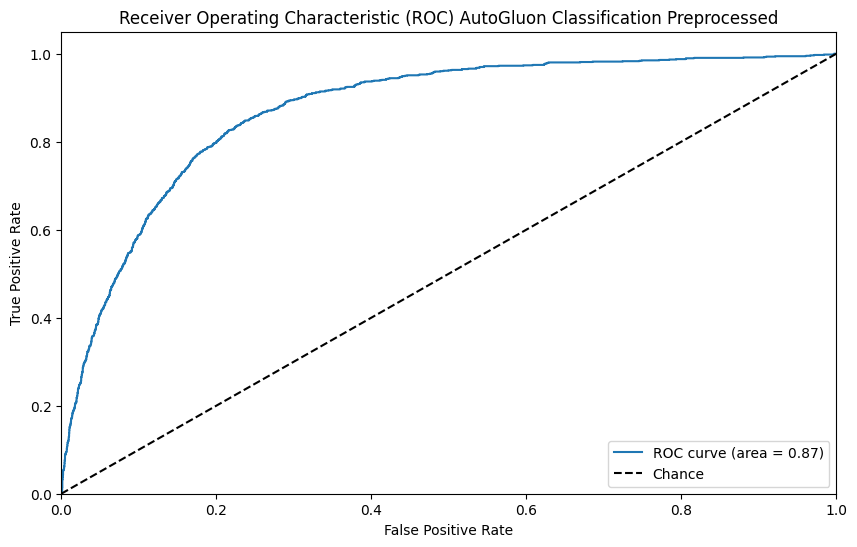

In [14]:
y_true = test_data['income']  
y_scores = predictor.predict_proba(test_data)[1] #positive class

# ROC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance') #diagonal line for 'chance'

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) AutoGluon Classification Preprocessed')
plt.legend(loc="lower right")


plt.savefig('AutoGluon_classification_preprocessed_roc_curve.png', dpi=300)
plt.show()